In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno

from sklearn.model_selection import train_test_split
from sklearn import preprocessing,model_selection


In [27]:
full_df=pd.read_csv("./car details v4.csv")

<Axes: >

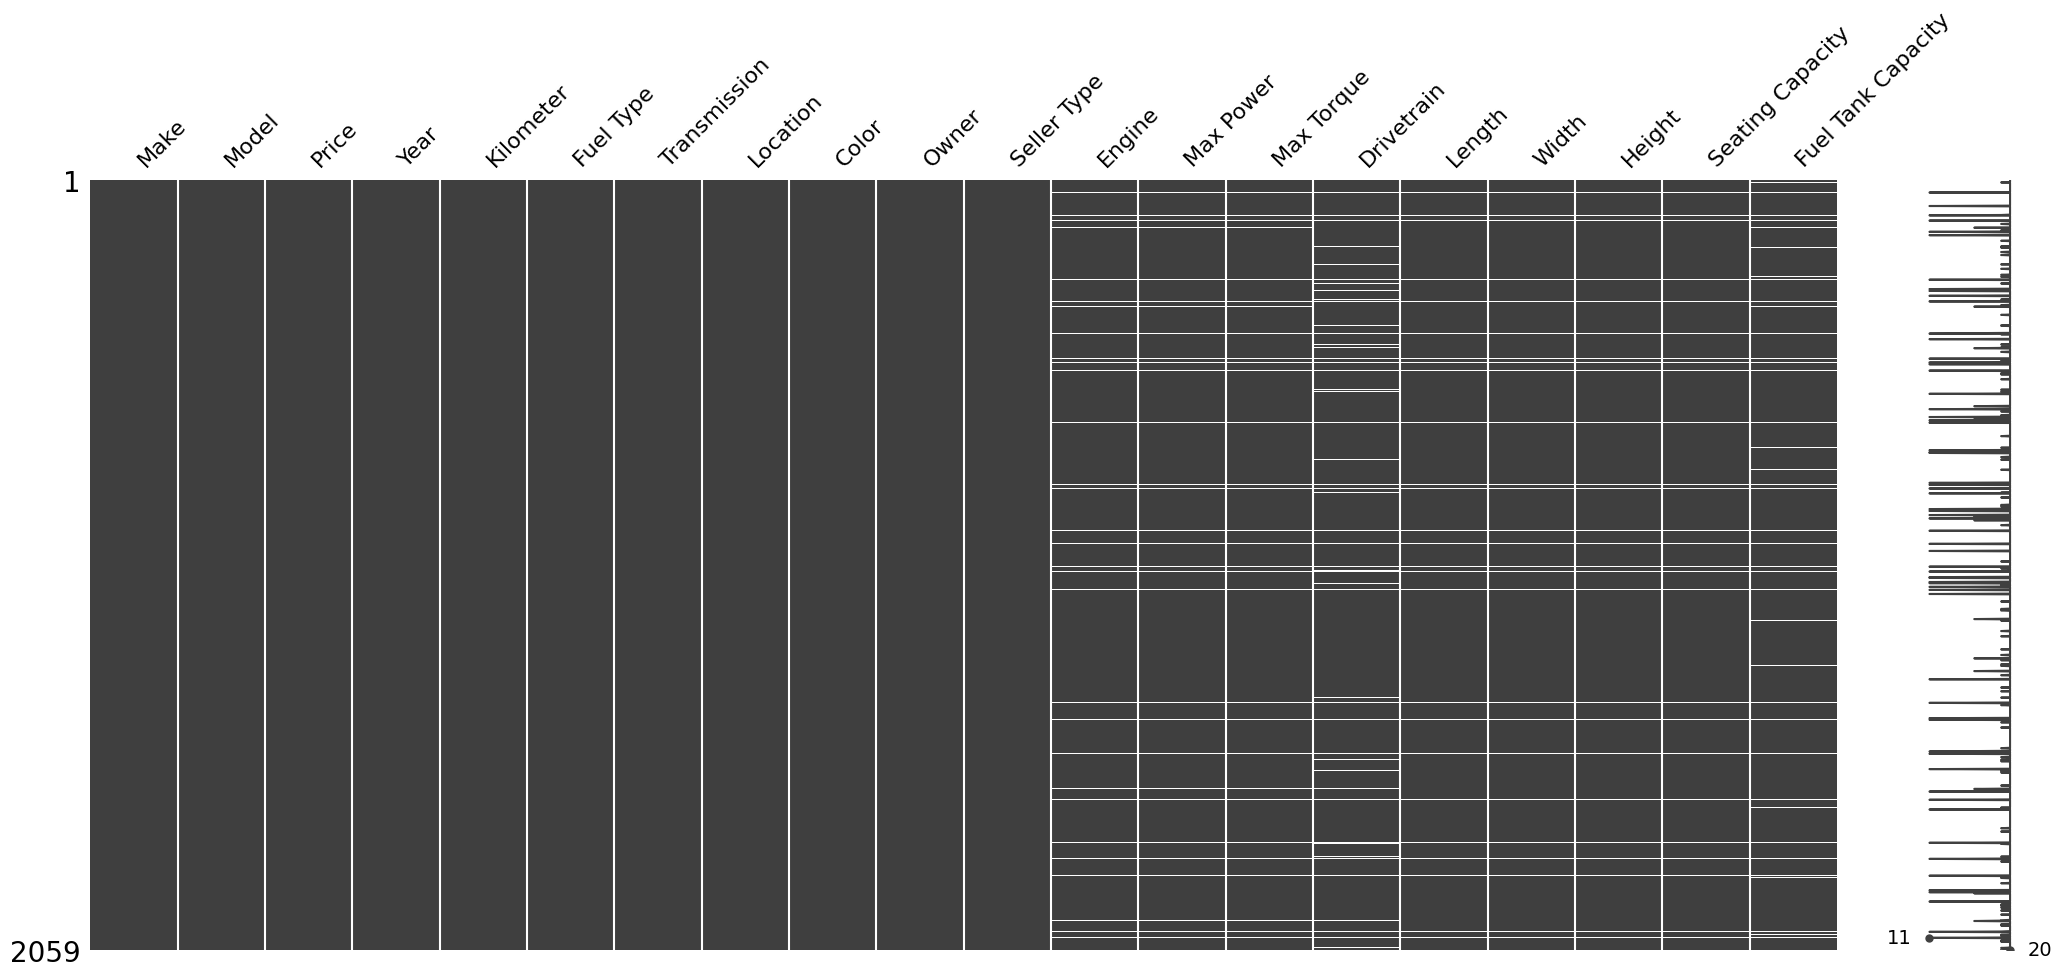

In [28]:
msno.matrix(full_df)

In [29]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2059 entries, 0 to 2058
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Make                2059 non-null   object 
 1   Model               2059 non-null   object 
 2   Price               2059 non-null   int64  
 3   Year                2059 non-null   int64  
 4   Kilometer           2059 non-null   int64  
 5   Fuel Type           2059 non-null   object 
 6   Transmission        2059 non-null   object 
 7   Location            2059 non-null   object 
 8   Color               2059 non-null   object 
 9   Owner               2059 non-null   object 
 10  Seller Type         2059 non-null   object 
 11  Engine              1979 non-null   object 
 12  Max Power           1979 non-null   object 
 13  Max Torque          1979 non-null   object 
 14  Drivetrain          1923 non-null   object 
 15  Length              1995 non-null   float64
 16  Width 

In [30]:
train_df, test_df = train_test_split(full_df, test_size=0.2) # 80% train, 20% test

In [31]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1647 entries, 299 to 1447
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Make                1647 non-null   object 
 1   Model               1647 non-null   object 
 2   Price               1647 non-null   int64  
 3   Year                1647 non-null   int64  
 4   Kilometer           1647 non-null   int64  
 5   Fuel Type           1647 non-null   object 
 6   Transmission        1647 non-null   object 
 7   Location            1647 non-null   object 
 8   Color               1647 non-null   object 
 9   Owner               1647 non-null   object 
 10  Seller Type         1647 non-null   object 
 11  Engine              1583 non-null   object 
 12  Max Power           1583 non-null   object 
 13  Max Torque          1583 non-null   object 
 14  Drivetrain          1538 non-null   object 
 15  Length              1597 non-null   float64
 16  Width    

In [32]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 412 entries, 787 to 741
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Make                412 non-null    object 
 1   Model               412 non-null    object 
 2   Price               412 non-null    int64  
 3   Year                412 non-null    int64  
 4   Kilometer           412 non-null    int64  
 5   Fuel Type           412 non-null    object 
 6   Transmission        412 non-null    object 
 7   Location            412 non-null    object 
 8   Color               412 non-null    object 
 9   Owner               412 non-null    object 
 10  Seller Type         412 non-null    object 
 11  Engine              396 non-null    object 
 12  Max Power           396 non-null    object 
 13  Max Torque          396 non-null    object 
 14  Drivetrain          385 non-null    object 
 15  Length              398 non-null    float64
 16  Width      

In [33]:
train_df.head()

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
299,Maruti Suzuki,Vitara Brezza VDi,725000,2018,42000,Diesel,Manual,Lucknow,White,First,Individual,1248 cc,89 bhp @ 4000 rpm,200 Nm @ 1750 rpm,FWD,3995.0,1790.0,1640.0,5.0,48.0
1023,Hyundai,Elite i20 Sportz 1.2 (O),650000,2020,58100,Petrol,Manual,Lucknow,White,First,Individual,1197 cc,82 bhp @ 6000 rpm,115 Nm @ 4000 rpm,FWD,3985.0,1734.0,1505.0,5.0,45.0
481,BMW,X5 xDrive 30d M Sport,4900000,2017,65341,Diesel,Automatic,Pune,White,Second,Individual,2993 cc,258 bhp @ 4000 rpm,560 Nm @ 1500 rpm,AWD,4886.0,1938.0,1762.0,5.0,NaN
1543,Audi,A3 35 TDI Premium Plus,1390000,2014,85900,Diesel,Automatic,Agra,Brown,First,Individual,1968 cc,141 bhp @ 3500 rpm,320 Nm @ 1750 rpm,FWD,4456.0,1796.0,1416.0,5.0,50.0
1392,Mercedes-Benz,A-Class A 180 Sport Petrol,1350000,2014,80000,Petrol,Automatic,Bangalore,White,Third,Individual,1595 cc,121 bhp @ 5000 rpm,200 Nm @ 1250 rpm,FWD,4292.0,1780.0,1433.0,4.0,50.0


In [34]:
test_df.head()

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
787,Hyundai,Creta SX 1.5 Diesel [2020-2022],1700000,2022,9000,Diesel,Manual,Raipur,Black,First,Individual,1493 cc,113 bhp @ 4000 rpm,250 Nm @ 1500 rpm,FWD,4300.0,1790.0,1635.0,5.0,50.0
369,Maruti Suzuki,Alto 800 Vxi (Airbag),355000,2020,40000,Petrol,Manual,Deoghar,White,First,Individual,796 cc,47 bhp @ 6000 rpm,69 Nm @ 3500 rpm,FWD,3395.0,1490.0,1475.0,5.0,35.0
1891,Mahindra,Thar LX 4-STR Hard Top Petrol MT,1520000,2021,14000,Petrol,Manual,Delhi,Brown,First,Individual,1997 cc,150 bhp @ 5000 rpm,300 Nm @ 1250 rpm,AWD,3985.0,1820.0,1844.0,4.0,57.0
1151,MINI,Cooper D 5 Door,3590000,2020,19759,Diesel,Automatic,Coimbatore,Blue,First,Individual,1496 cc,114 bhp @ 4000 rpm,270 Nm @ 1750 rpm,FWD,3982.0,1727.0,1425.0,5.0,44.0
912,Ford,Endeavour Titanium 2.0 4x2 AT,3975000,2021,9400,Diesel,Automatic,Delhi,Black,First,Individual,1996 cc,168 bhp @ 3500 rpm,420 Nm @ 2000 rpm,RWD,4903.0,1869.0,1837.0,7.0,80.0
